# Scenario

You are a data analyst at an environmental health organization. Your task is to explore air-pollution data across countries and cities, link it with public health outcomes (if possible), and identify regions most at risk. You’ll present clear insights and policy-directed recommendations.

## Import & Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("global air pollution dataset.csv")

In [3]:
df.head(4)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good


In [4]:
df.shape

(23463, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [6]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


## Data Cleaning

In [7]:
df.columns = ['Country', 'City', 'AQI_Value', 'AQI_Category', 'CO_AQI_Value',
       'CO_AQI_Category', 'Ozone_AQI_Value', 'Ozone_AQI_Category',
       'NO2_AQI_Value', 'NO2_AQI_Category', 'PM2.5_AQI_Value',
       'PM2.5_AQI_Category']

In [8]:
df.head(3)

,Country,City,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

Country               427
City                    1
AQI_Value               0
AQI_Category            0
CO_AQI_Value            0
CO_AQI_Category         0
Ozone_AQI_Value         0
Ozone_AQI_Category      0
NO2_AQI_Value           0
NO2_AQI_Category        0
PM2.5_AQI_Value         0
PM2.5_AQI_Category      0
dtype: int64

In [11]:
df['City'] = df['City'].fillna(df['City'].mode())

In [12]:
df['Country'].describe()

count                        23036
unique                         175
top       United States of America
freq                          2872
Name: Country, dtype: object

In [13]:
df['Country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23463 entries, 0 to 23462
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
23036 non-null  object
dtypes: object(1)
memory usage: 183.4+ KB


In [14]:
df['Country'] = df['Country'].fillna('Unknown')

In [15]:
df.isna().sum()

Country               0
City                  0
AQI_Value             0
AQI_Category          0
CO_AQI_Value          0
CO_AQI_Category       0
Ozone_AQI_Value       0
Ozone_AQI_Category    0
NO2_AQI_Value         0
NO2_AQI_Category      0
PM2.5_AQI_Value       0
PM2.5_AQI_Category    0
dtype: int64

In [16]:
df['City'].unique()

array(['Praskoveya', 'Presidente Dutra', 'Priolo Gargallo', ...,
       'Mormugao', 'Westerville', 'Marang'], dtype=object)

## Feature Engineering

Dominant pollutant → pollutant with the highest AQI value per city.

High-risk flag → 1 if AQI_Value > 150 (Unhealthy), else 0.

Pollution intensity score → combined AQI index (e.g., average or weighted sum of pollutant AQIs).

City averages → mean AQI and pollutant values grouped by city and country.

(Optional) Compute pollutant share — PM2.5 share of total AQI values.

In [17]:
# Dominant pollutant → pollutant with the highest AQI value per city.

df['Dominant_Pollutant'] = df[['CO_AQI_Value','Ozone_AQI_Value','NO2_AQI_Value','PM2.5_AQI_Value']].idxmax(axis = 1)
df['Dominant_Pollutant']

0        PM2.5_AQI_Value
1        PM2.5_AQI_Value
2        PM2.5_AQI_Value
3        Ozone_AQI_Value
4        Ozone_AQI_Value
              ...       
23458    PM2.5_AQI_Value
23459    PM2.5_AQI_Value
23460    PM2.5_AQI_Value
23461    PM2.5_AQI_Value
23462    PM2.5_AQI_Value
Name: Dominant_Pollutant, Length: 23463, dtype: object

In [18]:
dominant_per_city = df.groupby('City')['Dominant_Pollutant'].agg(lambda x: x.mode()[0]).reset_index() # we have multiple col indominant_per_city so thats why we use .agg 

dominant_per_city.head(10)

,City,Dominant_Pollutant
0,A Coruna,Ozone_AQI_Value
1,Aabenraa,PM2.5_AQI_Value
2,Aachen,PM2.5_AQI_Value
3,Aalborg,Ozone_AQI_Value
4,Aalburg,Ozone_AQI_Value
5,Aalen,PM2.5_AQI_Value
6,Aalsmeer,PM2.5_AQI_Value
7,Aalst,PM2.5_AQI_Value
8,Aalten,Ozone_AQI_Value
9,Aalter,PM2.5_AQI_Value


In [19]:
df['Dominant_Pollutant'].value_counts()

Dominant_Pollutant
PM2.5_AQI_Value    18276
Ozone_AQI_Value     5186
NO2_AQI_Value          1
Name: count, dtype: int64

In [20]:
# High-risk flag → 1 if AQI_Value > 150 (Unhealthy), else 0.

df['High-risk flag'] = (df['AQI_Value'].apply(lambda x : 1 if x > 150 else 0))
df['High-risk flag']

0        0
1        0
2        0
3        0
4        0
        ..
23458    1
23459    0
23460    0
23461    0
23462    0
Name: High-risk flag, Length: 23463, dtype: int64

In [21]:
# Pollution intensity score → combined AQI index (e.g., average or weighted sum of pollutant AQIs)
df['Pollution_intensity_score'] = df[['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']].mean(axis=1)


In [22]:
# City averages → mean AQI and pollutant values grouped by city and country
city_avg = df.groupby(['Country', 'City'])[['AQI_Value', 'CO_AQI_Value', 'Ozone_AQI_Value','NO2_AQI_Value', 'PM2.5_AQI_Value']].mean().reset_index()
city_avg

,Country,City,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value
0,Afghanistan,Acin,62.0,0.0,46.0,0.0,62.0
1,Afghanistan,Anar Darreh,126.0,1.0,42.0,0.0,126.0
2,Afghanistan,Andarab,104.0,0.0,34.0,0.0,104.0
3,Afghanistan,Asadabad,131.0,1.0,43.0,0.0,131.0
4,Afghanistan,Asmar,151.0,2.0,48.0,1.0,151.0
...,...,...,...,...,...,...,...
23458,Zimbabwe,Redcliffe,25.0,0.0,25.0,0.0,18.0
23459,Zimbabwe,Rusape,17.0,1.0,17.0,0.0,12.0
23460,Zimbabwe,Shurugwi,39.0,0.0,17.0,0.0,39.0
23461,Zimbabwe,Victoria Falls,26.0,0.0,26.0,0.0,14.0


In [23]:
# Compute pollutant share — PM2.5 share of total AQI values

df['Total_AQI'] = df[['CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value']].sum(axis=1)


In [24]:
df['PM2.5_Share'] =df['PM2.5_AQI_Value'] / df['Total_AQI']

In [25]:
df['PM2.5_Share%'] = df['PM2.5_Share'] * 100

In [26]:
df.head(3)

,Country,City,AQI_Value,AQI_Category,CO_AQI_Value,CO_AQI_Category,Ozone_AQI_Value,Ozone_AQI_Category,NO2_AQI_Value,NO2_AQI_Category,PM2.5_AQI_Value,PM2.5_AQI_Category,Dominant_Pollutant,High-risk flag,Pollution_intensity_score,Total_AQI,PM2.5_Share,PM2.5_Share%
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,PM2.5_AQI_Value,0,22.0,88,0.579545,57.954545
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,PM2.5_AQI_Value,0,12.0,48,0.854167,85.416667
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,PM2.5_AQI_Value,0,27.0,108,0.611111,61.111111


## Step 4 — Exploratory Data Analysis (EDA)
Which countries and cities show the highest average AQI_Value?

What proportion of observations fall into each AQI_Category (e.g., Good, Moderate, Unhealthy)?

Which pollutant (CO, Ozone, NO₂, PM2.5) contributes most often as the dominant pollutant?

Which countries have the greatest share of high-risk records (AQI > 150)?

How are different pollutants related? — check correlation between CO_AQI_Value, Ozone_AQI_Value, NO2_AQI_Value, and PM2.5_AQI_Value.

Are there cities that show high AQI despite moderate individual pollutants — suggesting combined effects?

What is the distribution of AQI values within each category (e.g., average AQI per category)?

Which countries tend to exceed “Good” AQI limits most frequently?

In [27]:
# Which countries and cities show the highest average AQI_Value?

highest_average_AQI_Value = df.groupby(['Country', 'City'])['AQI_Value'].mean().sort_values(ascending= False).reset_index()
highest_average_AQI_Value.head(10)

,Country,City,AQI_Value
0,India,Sikandarabad,500.0
1,India,Kasganj,500.0
2,India,Kandhla,500.0
3,India,Nohar,500.0
4,India,Niwari,500.0
5,India,Hansi,500.0
6,India,Khatauli,500.0
7,India,Kanina,500.0
8,India,Tajpur,500.0
9,India,Gopamau,500.0


In [28]:
# What proportion of observations fall into each AQI_Category (e.g., Good, Moderate, Unhealthy)?
df['AQI_Category'].value_counts()



AQI_Category
Good                              9936
Moderate                          9231
Unhealthy                         2227
Unhealthy for Sensitive Groups    1591
Very Unhealthy                     287
Hazardous                          191
Name: count, dtype: int64

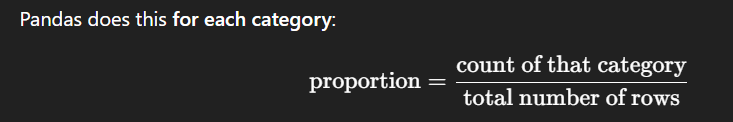

In [29]:
proportion_of_observations = df['AQI_Category'].value_counts(normalize=True) * 100
proportion_of_observations

AQI_Category
Good                              42.347526
Moderate                          39.342795
Unhealthy                          9.491540
Unhealthy for Sensitive Groups     6.780889
Very Unhealthy                     1.223202
Hazardous                          0.814048
Name: proportion, dtype: float64

In [30]:
# Which pollutant (CO, Ozone, NO₂, PM2.5) contributes most often as the dominant pollutant?
df['Dominant_Pollutant'].value_counts(normalize=True) * 100


Dominant_Pollutant
PM2.5_AQI_Value    77.892853
Ozone_AQI_Value    22.102885
NO2_AQI_Value       0.004262
Name: proportion, dtype: float64

In [31]:
# Which countries have the greatest share of high-risk records (AQI > 150)?
df['flag_Aqi_Value'] = df['AQI_Value'] >150
greatest_share_of_high_risk_country = df.groupby('Country')['flag_Aqi_Value'].mean().sort_values(ascending= False).reset_index()
greatest_share_of_high_risk_country.head(10)

,Country,flag_Aqi_Value
0,Aruba,1.000000
1,Bahrain,1.000000
2,Kuwait,1.000000
3,United Arab Emirates,1.000000
4,Qatar,1.000000
5,Republic of Korea,1.000000
6,Mauritania,1.000000
7,Pakistan,0.856678
8,Senegal,0.666667
9,Gambia,0.666667


In [32]:
# How are different pollutants related? — check correlation between CO_AQI_Value, Ozone_AQI_Value, NO2_AQI_Value, and PM2.5_AQI_Value.

pollutants_relation = df[['CO_AQI_Value','Ozone_AQI_Value','NO2_AQI_Value', 'PM2.5_AQI_Value']].corr()
pollutants_relation

,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value
CO_AQI_Value,1.000000,0.145724,0.488092,0.438557
Ozone_AQI_Value,0.145724,1.000000,-0.181818,0.339887
NO2_AQI_Value,0.488092,-0.181818,1.000000,0.260127
PM2.5_AQI_Value,0.438557,0.339887,0.260127,1.000000


In [33]:
# Are there cities that show high AQI despite moderate individual pollutants — suggesting combined effects?

cities_with_high_Aqi = df.groupby('City')[['AQI_Value','CO_AQI_Value','Ozone_AQI_Value','NO2_AQI_Value','PM2.5_AQI_Value']].mean().reset_index()
cities_with_high_Aqi.head(5)

,City,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value
0,A Coruna,27.0,0.0,27.0,1.0,20.0
1,Aabenraa,45.0,1.0,38.0,2.0,45.0
2,Aachen,55.0,1.0,43.0,1.0,55.0
3,Aalborg,46.0,1.0,46.0,0.0,12.0
4,Aalburg,30.0,0.0,30.0,2.0,29.0


In [34]:
# What is the distribution of AQI values within each category (e.g., average AQI per category)?

AQI_values_within_each_category =  df.groupby('AQI_Category')['AQI_Value'].mean().reset_index()
AQI_values_within_each_category

,AQI_Category,AQI_Value
0,Good,36.480978
1,Hazardous,440.937173
2,Moderate,66.454664
3,Unhealthy,166.712618
4,Unhealthy for Sensitive Groups,121.135135
5,Very Unhealthy,228.080139


In [35]:
# Which countries tend to exceed “Good” AQI limits most frequently?

df['countries_exceed_flag'] = df['AQI_Category'].apply(lambda x : 0 if x == "Good" else 1)

In [36]:
countries_which_exceeds = df.groupby('Country')['countries_exceed_flag'].mean().sort_values(ascending = False).reset_index()
countries_which_exceeds.head(10)

,Country,countries_exceed_flag
0,Aruba,1.0
1,Bahrain,1.0
2,Barbados,1.0
3,Egypt,1.0
4,Congo,1.0
5,Montenegro,1.0
6,Mauritania,1.0
7,Lesotho,1.0
8,Kingdom of Eswatini,1.0
9,Haiti,1.0


## Step 5 — Data Visualization

Bar chart: top 10 most polluted cities by AQI_Value.

Count plot: number of cities by AQI_Category.


Heatmap: correlation between pollutant AQIs.

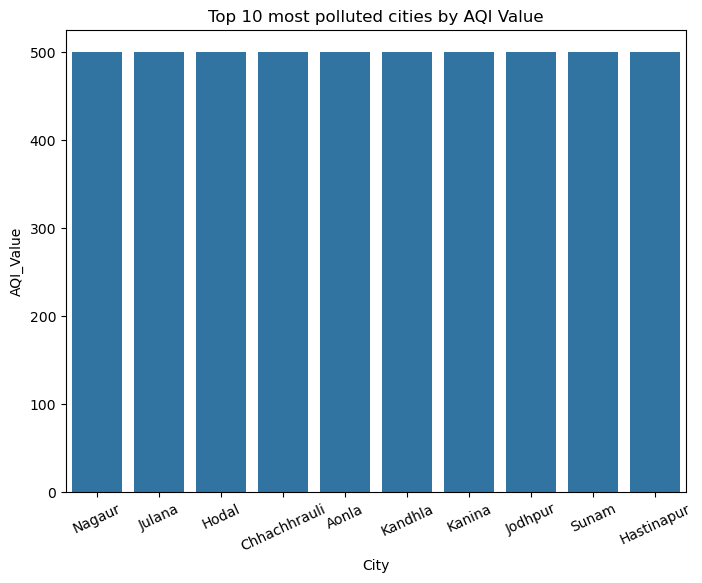

In [37]:
# Bar chart: top 10 most polluted cities by AQI_Value.

top_10_most_polluted_cities = df.groupby('City')['AQI_Value'].mean().sort_values(ascending= False).head(10).reset_index()


plt.figure(figsize = (8,6))
sns.barplot(data = top_10_most_polluted_cities , x = 'City' , y = 'AQI_Value')
plt.title('Top 10 most polluted cities by AQI Value')
plt.xlabel('City')
plt.ylabel('AQI_Value')
plt.xticks(rotation=25)
plt.show()

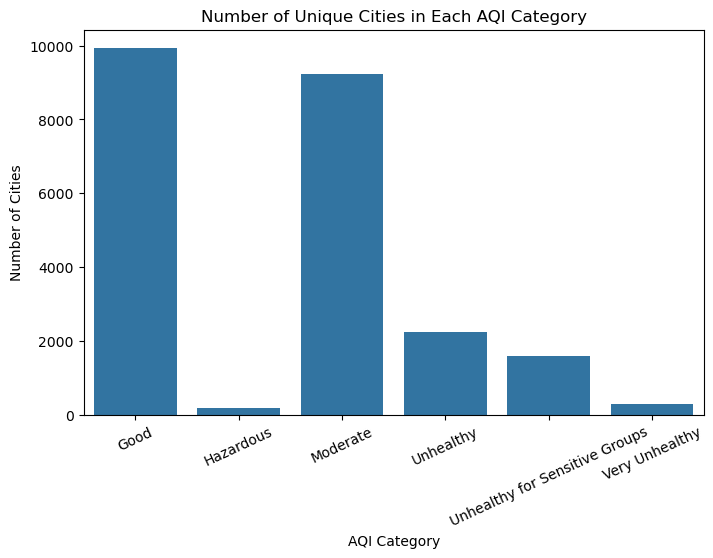

In [49]:
# Count number of records in each AQI category
city_counts = df.groupby('AQI_Category')['City'].nunique().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=city_counts, x='AQI_Category', y='City')
plt.title("Number of Unique Cities in Each AQI Category")
plt.xlabel("AQI Category")
plt.ylabel("Number of Cities")
plt.xticks(rotation=25)
plt.show()

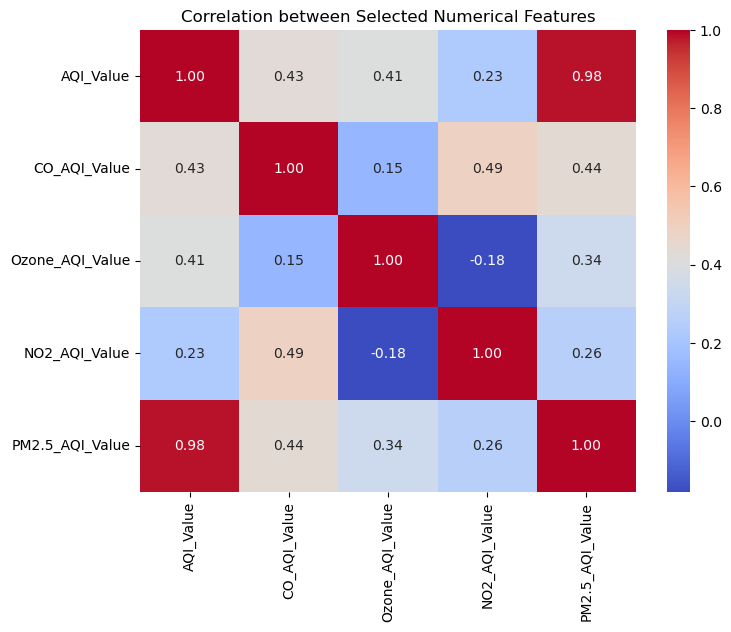

In [58]:
# Heatmap: correlation between pollutant AQIs.
selected = ['AQI_Value','CO_AQI_Value','Ozone_AQI_Value','NO2_AQI_Value','PM2.5_AQI_Value']
corr_matrix = df[selected].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Selected Numerical Features')
plt.show()

## Insights & Recommendations

PM2.5 is a central problem. Your PM2.5_Share and pollution_intensity_score reveal that PM2.5 contributes the largest share of total pollutant burden in many of the highest-AQI cities making it the top target for public-health interventions.

High-risk clusters are identifiable. The high_risk flag (AQI > 150) highlights specific cities and countries with frequent unhealthy days these clusters should be prioritized for immediate mitigation.

Pollutant co-movement: Correlation analysis shows that overall AQI_Value tracks closely with PM2.5 and NO₂ in your dataset where PM2.5 and NO₂ rise together, overall air quality tends to worsen fastest.

Mixed contributor cases exist. There are cities where total AQI is high even though no single pollutant is extremely dominant this suggests cumulative or multiple-source pollution (traffic + industry + seasonal burning).

Country-level differences matter. Aggregated country statistics show some countries have high average AQI driven by many moderately polluted cities, while others have extreme pollution concentrated in a few hotspots — policy responses should be tailored accordingly.